# Importing Libraries for Image Processing

- `PIL (Pillow)`: For image opening and manipulation.
- `cv2 (OpenCV)`: For advanced image processing tasks.
- `numpy`: For numerical operations and array handling.
- `requests`: To fetch images or data from the web via HTTP requests.


In [1]:
from PIL import Image
import cv2
import numpy as np
import requests 

# Loading and Processing an Image from a URL

- Downloads an image directly from a web URL using `requests`.
- Opens the image using PIL’s `Image.open`.
- Resizes the image to a fixed size (450x250 pixels) for consistency.
- Converts the PIL image to a NumPy array for further processing.
- Displays the image inline.


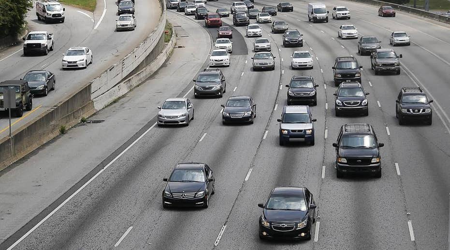

In [2]:
image = Image.open(requests.get('https://a57.foxnews.com/media.foxbusiness.com/BrightCove/854081161001/201805/2879/931/524/854081161001_5782482890001_5782477388001-vs.jpg', stream=True).raw)
image = image.resize((450,250))
image_arr = np.array(image)
image

# Converting an RGB Image to Grayscale

- Converts the PIL RGB image array to OpenCV’s BGR format.
- Applies OpenCV’s `cvtColor` to convert the image to grayscale.
- Converts the grayscale NumPy array back to a PIL Image for easy display.


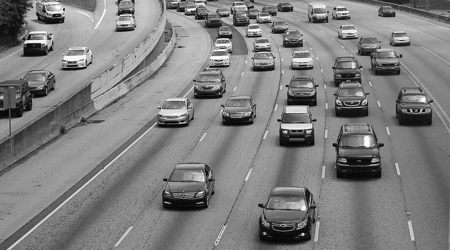

In [3]:
grey = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)

# Applying Gaussian Blur to the Grayscale Image

- Uses OpenCV’s `GaussianBlur` function with a 5x5 kernel to smooth the image.
- Reduces noise and detail, which can improve downstream processing like edge detection or OCR.
- Returns a blurred image as a NumPy array, converted back to a PIL Image for display.


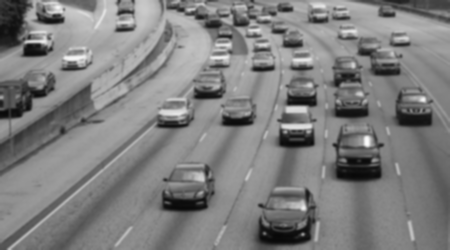

In [4]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

# Applying Dilation to the Blurred Image

- Uses OpenCV’s `dilate` function with a 3x3 kernel to expand bright regions.
- Helps to enhance and connect features like text strokes or edges.
- Converts the dilated NumPy array back to a PIL Image for display.


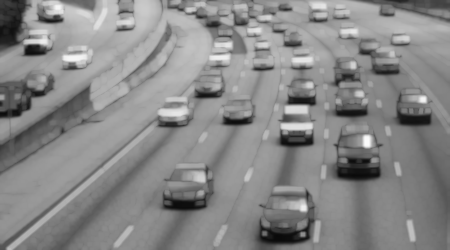

In [5]:
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

# Applying Morphological Closing to the Dilated Image

- Creates an elliptical structuring element (kernel) of size 2x2 using OpenCV.
- Applies morphological closing (`MORPH_CLOSE`) to fill small holes and gaps in bright regions.
- Helps smooth contours and connect adjacent features for better image quality.
- Converts the processed NumPy array back to a PIL Image for visualization.


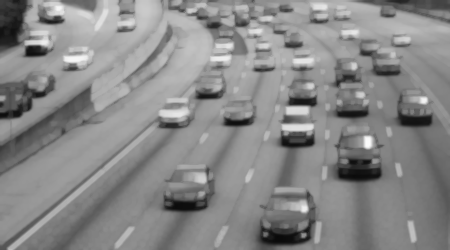

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel) 
Image.fromarray(closing)

# Detecting Cars Using Haar Cascade Classifier

- Loads a pre-trained Haar cascade XML file for car detection.
- Initializes the cascade classifier with the given XML.
- Applies `detectMultiScale` on the processed image (`closing`) to find car-like objects.
- Parameters:
  - `1.1`: Scale factor specifying how much the image size is reduced at each image scale.
  - `1`: Minimum number of neighbors each candidate rectangle should have to retain it.
- Returns bounding boxes of detected cars for further processing or visualization.


In [7]:
car_cascade_src = '/kaggle/input/harcascade/cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

# Drawing Bounding Boxes Around Detected Cars

- Iterates over detected car coordinates `(x, y, w, h)`.
- Draws blue rectangles (`(255,0,0)`) around each detected car on the original image array.
- Counts the total number of cars detected.
- Prints the count for user reference.
- Converts the annotated NumPy image back to a PIL Image for display.


22  cars found


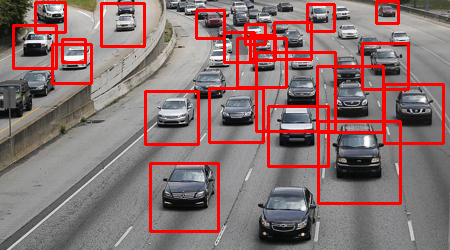

In [8]:
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " cars found")
Image.fromarray(image_arr)

# Reading and Preprocessing an Image from URL

- Downloads an image from the specified URL using `requests`.
- Opens the image with PIL and resizes it to 450x250 pixels.
- Converts the resized image into a NumPy array for processing.
- Converts the RGB image array to grayscale using OpenCV’s `cvtColor` function.


In [9]:
# Reading image form url
image2 = Image.open(requests.get('https://qph.fs.quoracdn.net/main-qimg-b5c4e39dcd48dddd9e609e6022f74d85', stream=True).raw)
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2,cv2.COLOR_BGR2GRAY)

# Detecting Buses Using Haar Cascade Classifier

- Loads a pre-trained Haar cascade XML file for bus detection (`Bus_front.xml`).
- Initializes the cascade classifier with the provided XML file.
- Applies `detectMultiScale` on the grayscale image to detect bus-like objects.
- Parameters:
  - `1.1`: Scale factor controlling image size reduction at each scale.
  - `1`: Minimum number of neighbor rectangles to retain a detection.
- Returns bounding boxes around detected buses for further processing or visualization.


In [10]:
bus_cascade_src = '/kaggle/input/harcascade/Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

# Drawing Bounding Boxes Around Detected Buses

- Iterates over detected bus bounding boxes `(x, y, w, h)`.
- Draws blue rectangles `(255, 0, 0)` around each detected bus on the original image.
- Counts the total number of buses detected.
- Prints the count for user feedback.
- Converts the annotated NumPy array back to a PIL Image for visualization.


1  bus's found


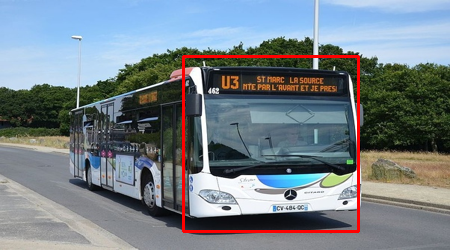

In [11]:
cnt = 0
for (x,y,w,h) in bus:
  cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
  cnt += 1
print(cnt, " bus's found")
Image.fromarray(image_arr2)

# Vehicle Detection and Annotated Video Saving

- Loads the input video and Haar cascade classifier for cars.
- Checks if the video file is opened successfully and reads the first frame to get frame size.
- Resets the video capture to the beginning after retrieving size.
- Defines a `VideoWriter` object with `XVID` codec, 15 FPS, and original frame size.
- Loops through each frame in the video:
  - Converts the frame to grayscale for detection.
  - Detects cars using the cascade classifier.
  - Draws red bounding boxes `(0, 0, 255)` around detected cars.
  - Writes the annotated frame to the output video file.
- Releases both capture and writer objects after processing completes.
- Prints confirmation after saving video as `result.avi`.


In [12]:
cascade_src = '/kaggle/input/harcascade/cars.xml'
video_src = '/kaggle/input/harcascade/Cars.mp4'

# Load video and classifier
cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)

# Check if video is opened
if not cap.isOpened():
    print("Error: Cannot open video.")
else:
    # Get frame size
    ret, frame = cap.read()
    if not ret:
        print("Error: Cannot read first frame.")
    else:
        height, width = frame.shape[:2]
        size = (width, height)
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)  # Reset to start

        # Define the codec and output video
        out = cv2.VideoWriter('/kaggle/working/result.avi', cv2.VideoWriter_fourcc(*'XVID'), 15, size)

        while True:
            ret, frame = cap.read()
            if not ret:
                break
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            cars = car_cascade.detectMultiScale(gray, 1.1, 1)

            for (x, y, w, h) in cars:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

            out.write(frame)  # <--- Don't forget to write frame

        cap.release()
        out.release()
        print("Video saved as result.avi")


Video saved as result.avi


# Converting AVI Video to MP4 Format Using FFmpeg

- Uses `ffmpeg` command-line tool to convert the video file from `.avi` to `.mp4`.
- Input file: `/kaggle/working/result.avi`.
- Output file: `cars_output.mp4`.
- `-y` flag automatically overwrites the output file if it already exists.
- MP4 format offers better compatibility and smoother playback, especially in browsers and notebooks.


In [13]:
!ffmpeg -i /kaggle/working/result.avi cars_output.mp4 -y

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

# Displaying MP4 Video Inline in Jupyter Notebook

- Uses IPython’s `Video` class to embed and play the video directly in the notebook.
- Specifies the path to the MP4 video file.
- Enables embedding with `embed=True`.
- Sets the video display width to 450 pixels for layout control.
- Provides an easy way to preview videos without leaving the notebook.


In [14]:
from IPython.display import Video
Video("/kaggle/working/cars_output.mp4", embed=True, width=450)